# **Malliavin Calculus for Option Greeks Estimation**
## **Contents**
1. [Introduction](#Introduction)
2. [Delta of a European Call Option](#Delta-of-a-European-Call-Option)
   - [Theoretical Results for the European Call Delta](#Theoretical-Results-for-the-European-Call-Delta)
   - [Python Implementation for the European Call Delta](#Python-Implementation-for-the-European-Call-Delta)
3. [Vega of a European Call Option](#Vega-of-a-European-Call-Option)
   - [Theoretical Results for the European Call Vega](#Theoretical-Results-for-the-European-Call-Vega)
   - [Python Implementation for the European Call Vega](#Python-Implementation-for-the-European-Call-Vega)
2. [Gamma of a European Call Option](#Gamma-of-a-European-Call-Option)
   - [Theoretical Results for the European Call Gamma](#Theoretical-Results-for-the-European-Call-Gamma)
   - [Python Implementation for the European Call Gamma](#Python-Implementation-for-the-European-Call-Gamma)
5. [Delta of an Asian Fixed Strike Call Option](#Delta-of-an-Asian-Fixed-Strike-Call-Option)
   - [Theoretical Results for the Asian Fixed Strike Call Delta](#Theoretical-Results-for-the-Asian-Fixed-Strike-Call-Delta)
   - [Python Implementation for the Asian Fixed Strike Call Delta](#Python-Implementation-for-the-Asian-Fixed-Strike-Call-Delta)
5. [Gamma of an Asian Fixed Strike Call Option](#Gamma-of-an-Asian-Fixed-Strike-Call-Option)
   - [Theoretical Results for the Asian Fixed Strike Call Gamma](#Theoretical-Results-for-the-Asian-Fixed-Strike-Call-Gamma)
   - [Python Implementation for the Asian Fixed Strike Call Gamma](#Python-Implementation-for-the-Asian-Fixed-Strike-Call-Gamma)
7. [Credits](#Credits)

## **Introduction**
This project aims to implement the Monte Carlo method in Python in order to estimate the Greeks of European and Asian options contracts written on a risk-bearing financial asset. In particular, the formulas used in the Python implementation are for the Delta, Vega and Gamma of European Call options, as well as the Delta and Gamma of an Asian Fixed Strike Call Option, and have been derived using Malliavin Calculus (all of the background for this project can be found [here](https://github.com/mzakariaz/Projects/blob/main/miscellaneous/Application%20of%20the%20Malliavin%20Calculus%20to%20the%20Black%20Scholes%20Model/Applications_of_the_Malliavin_Calculus_to_the_Black_Scholes_Model.pdf)). The `time`, `numpy`, `scipy`, `pandas`, `matplotlib`, `seaborn` and `warinings` libraries are imported for all the numerical calculations and data visualizations involved. Moreover, a random seed value is set for reproducibility, the plot styles are set for aesthetic reasons and some warnings will be ignored (as those are especially about deprecated features not used in this project at the time of conception).

In [31]:
import time as tm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

np.random.seed(30)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})
warnings.simplefilter(action = 'ignore', category = FutureWarning)

r, sigma, S0, K, T, M, N = 0.1, 0.2, 100, 100, 1, 50, 1000000

## **Delta of a European Call Option**

### **Theoretical Results for the European Call Delta**
- Payoff function:
$$\Phi(S_{T}) = (S_{T} - K)^{+}$$
- Definition:
$$\Delta = \frac{\partial V_{0}}{\partial S_{0}}$$
- Analytic expression:
$$\Delta = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d}e^{-\frac{x^2}{2}}\mathrm{d}x$$
where:
$$d = \frac{\ln\left(\frac{S_{0}}{K}\right) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$$
- Malliavin expression:
$$\Delta = \frac{e^{-rT}}{\sigma T S_{0}}\mathbb{E}\left[\Phi(S_{T})W_{T}\right]$$

### **Python Implementation for the European Call Delta**

Risk-free interest rate: r = 0.1
Volatility: σ = 0.2
Initial asset price: S₀ = 100
Strike price: K = 100
Maturity date: T = 1
Number of simulations: N = 1,000,000
Estimate: Δ ≈ 0.7260913494034357
Exact value: Δ = 0.7257468822499265
Relative error: 0.05%
Computation time: 0.049 seconds
Iterations per second: 20,442,070


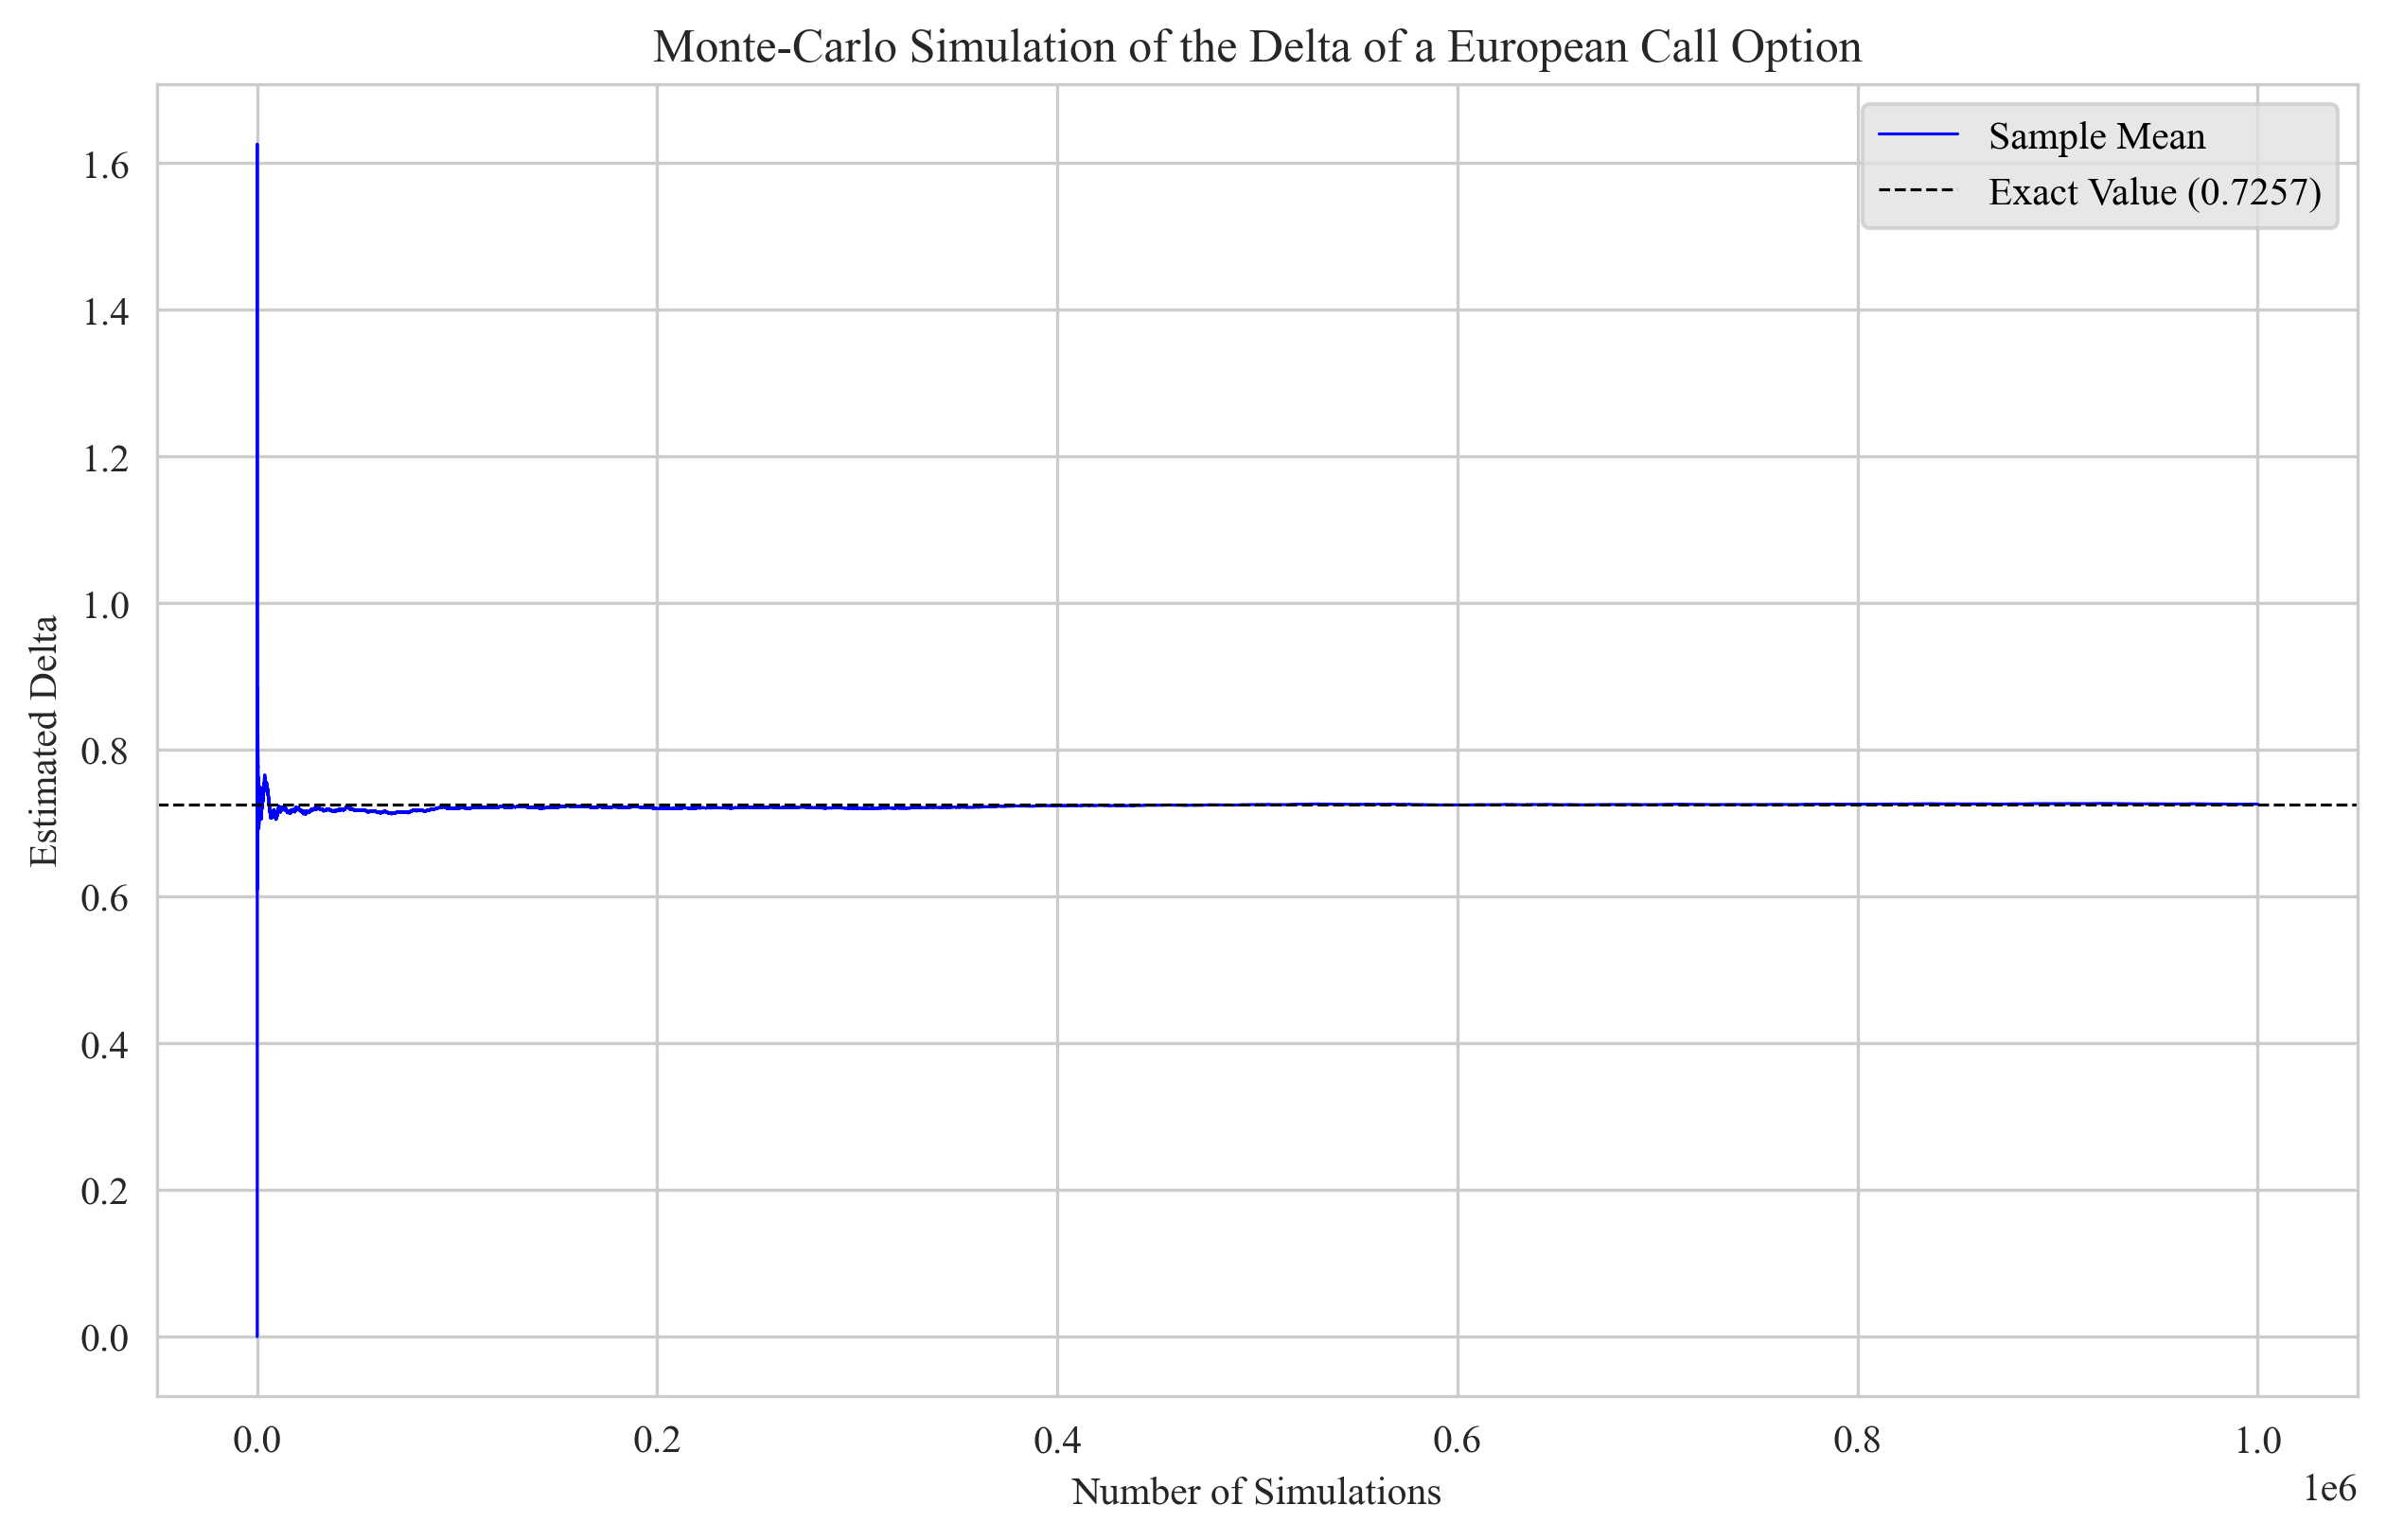

0.7260913494034357

In [32]:
def MonteCarloEuropeanCallDelta(r, sigma, S0, K, T, N, show_performance_metrics = False, show_visualisations = False):
    start = tm.time()
    W = np.random.normal(0, 1, N)
    S = S0 * np.exp((r - (sigma**2) / 2) * T + sigma * np.sqrt(T) * W)                                 
    V = np.maximum(S - K, 0)
    SAMPLE = np.exp(-r * T)* V * W / (S0 * T * sigma)
    PATH = np.cumsum(SAMPLE) / np.arange(1, N + 1)
    end = tm.time()
    estimate = PATH[-1]
    if show_performance_metrics:
        computation_time = end - start
        if computation_time == 0.0:
            iterations_per_second = "\u221E"
        else:
            iterations_per_second = f"{int(N / computation_time):,}"
        d = (np.log(S0 / K) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
        Delta = sp.stats.norm.cdf(d)
        symbol = "S0".translate(str.maketrans("0", "₀"))
        relative_error = (estimate - Delta) / estimate
        print(f"Risk-free interest rate: r = {r}")
        print(f"Volatility: \u03C3 = {sigma}")
        print(f"Initial asset price: {symbol} = {S0}")
        print(f"Strike price: K = {K}")
        print(f"Maturity date: T = {T}")
        print(f"Number of simulations: N = {N:,}")
        print(f"Estimate: \u0394 \u2248 {estimate}")
        print(f"Exact value: \u0394 = {Delta}")
        print(f"Relative error: {100 * relative_error:.2f}%")
        print(f"Computation time: {computation_time:.3f} seconds")
        print(f"Iterations per second: {iterations_per_second}")
    else:
        pass
    if show_visualisations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = PATH, linewidth = 0.75, color = "b", label = "Sample Mean").set(xlabel = "Number of Simulations", ylabel = "Estimated Delta")
        plt.axhline(Delta, color = "black", linestyle = "--", linewidth = 0.75, label = f"Exact Value ({Delta:.4f})")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title("Monte-Carlo Simulation of the Delta of a European Call Option")
        plt.show()
    else:
        pass
    return estimate

MonteCarloEuropeanCallDelta(r, sigma, S0, K, T, N, True, True)

## **Vega of a European Call Option**
### **Theoretical Results for the European Call Vega**
- Payoff function: 
$$\Phi(S_{T}) = (S_{T} - K)^{+}$$
- Definition: 
$$\mathcal{V} = \frac{\partial V_{0}}{\partial \sigma}$$
- Analytic expression: 
$$\mathcal{V} = S_{0}e^{-\frac{d^2}{2}}\sqrt{\frac{T}{2\pi}}$$
where: 
$$d = \frac{\ln\left(\frac{S_{0}}{K}\right) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$$
- Malliavin expression:
$$\mathcal{V} = e^{-rT}\mathbb{E}\left[\Phi(S_{T})\left(\frac{W_{T}^2-T}{\sigma T} - W_{T}\right)\right]$$

### **Python Implementation for the European Call Vega**

Risk-free interest rate: r = 0.1
Volatility: σ = 0.2
Initial asset price: S₀ = 100
Strike price: K = 100
Maturity date: T = 1
Number of simulations: N = 1,000,000
Estimate: 𝓥 ≈ 33.26335275179105
Exact value: 𝓥 = 33.322460289179965
Relative error: -0.18%
Computation time: 0.080 seconds
Iterations per second: 12,551,971


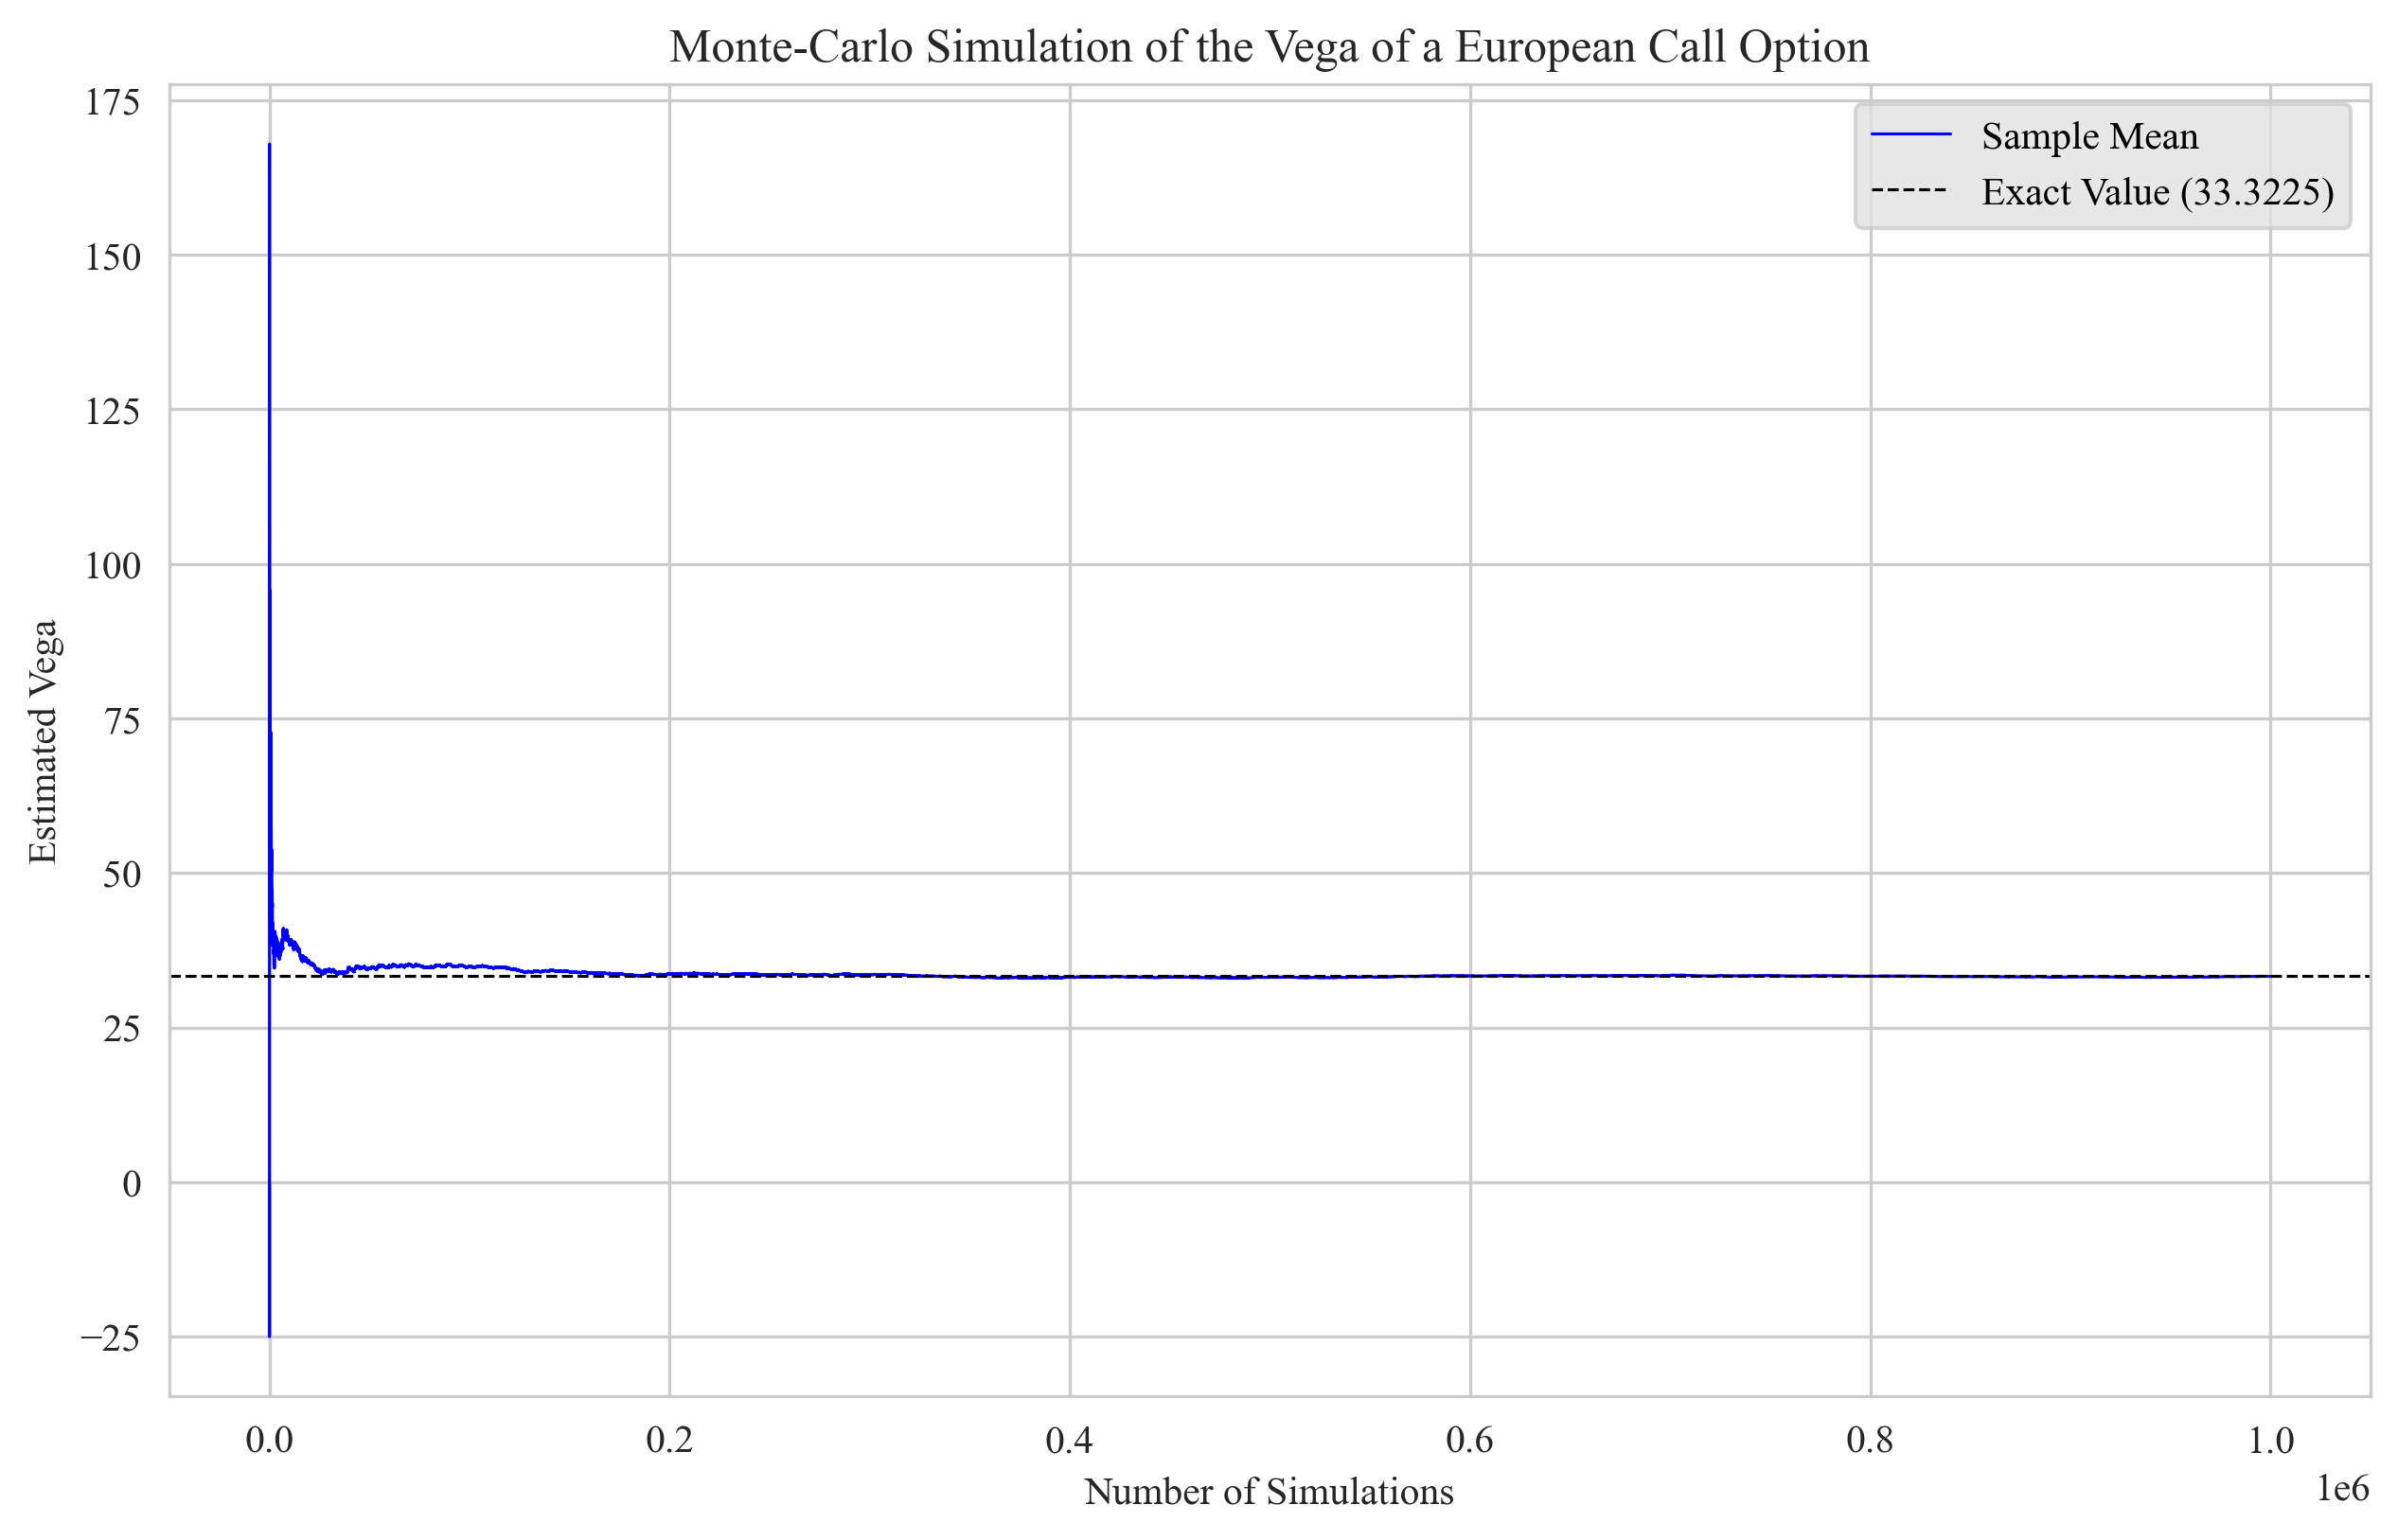

33.26335275179105

In [33]:
def MonteCarloEuropeanCallVega(r, sigma, S0, K, T, N, show_performance_metrics = False, show_visualisations = False):
    start = tm.time()
    W = np.random.normal(0, 1, N)                                            
    S = S0 * np.exp((r - (sigma**2) / 2) * T + sigma * np.sqrt(T) * W)                                 
    V = np.maximum(S - K, 0)
    SAMPLE = np.exp(-r * T)* V * ((W**2 - T) / (sigma * T) - W)
    PATH = np.cumsum(SAMPLE) / np.arange(1, N + 1)
    end = tm.time()
    estimate = PATH[-1]
    if show_performance_metrics:
        computation_time = end - start
        if computation_time == 0.0:
            iterations_per_second = "\u221E"
        else:
            iterations_per_second = f"{int(N / computation_time):,}"
        d = (np.log(S0 / K) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
        Vega = S0 * np.exp(-d**2 / 2) * np.sqrt(T / (2 * np.pi))
        symbol = "S0".translate(str.maketrans("0", "₀"))
        relative_error = (estimate - Vega) / estimate
        print(f"Risk-free interest rate: r = {r}")
        print(f"Volatility: \u03C3 = {sigma}")
        print(f"Initial asset price: {symbol} = {S0}")
        print(f"Strike price: K = {K}")
        print(f"Maturity date: T = {T}")
        print(f"Number of simulations: N = {N:,}")
        print(f"Estimate: \U0001D4E5 \u2248 {estimate}")
        print(f"Exact value: \U0001D4E5 = {Vega}")
        print(f"Relative error: {100 * relative_error:.2f}%")
        print(f"Computation time: {computation_time:.3f} seconds")
        print(f"Iterations per second: {iterations_per_second}")
    else:
        pass
    if show_visualisations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = PATH, linewidth = 0.75, color = "b", label = "Sample Mean").set(xlabel = "Number of Simulations", ylabel = "Estimated Vega")
        plt.axhline(Vega, color = "black", linestyle = "--", linewidth = 0.75, label = f"Exact Value ({Vega:.4f})")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title("Monte-Carlo Simulation of the Vega of a European Call Option")
        plt.show()
    else:
        pass
    return estimate

MonteCarloEuropeanCallVega(r, sigma, S0, K, T, N, True, True)

## **Monte-Carlo Simulation of the Gamma of a European Call Option**
### **Theoretical Results for the European Call Gamma**
- Payoff function: $$\Phi(S_{T}) = (S_{T} - K)^{+}$$
- Definition: $$\Gamma = \frac{\partial^2 V_{0}}{\partial S_{0}^2}$$
- Analytic expression: $$\Gamma = \frac{e^{-\frac{d^2}{2}}}{S_{0}\sigma\sqrt{2\pi T}}$$
where: $$d = \frac{\ln\left(\frac{S_{0}}{K}\right) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$$
- Malliavin expression: $$\Gamma = \frac{e^{-rT}}{\sigma T S_{0}^2}\mathbb{E}\left[\Phi(S_{T})\left(\frac{W_{T}^2-T}{\sigma T} - W_{T}\right)\right] $$

### **Python Implementation for the European Call Gamma**

Risk-free interest rate: r = 0.1
Volatility: σ = 0.2
Initial asset price: S₀ = 100
Strike price: K = 100
Maturity date: T = 1
Number of simulations: N = 1,000,000
Estimate: Γ ≈ 0.016806853318819464
Exact value: Γ = 0.016661230144589985
Relative error: 0.87%
Computation time: 0.072 seconds
Iterations per second: 13,934,055


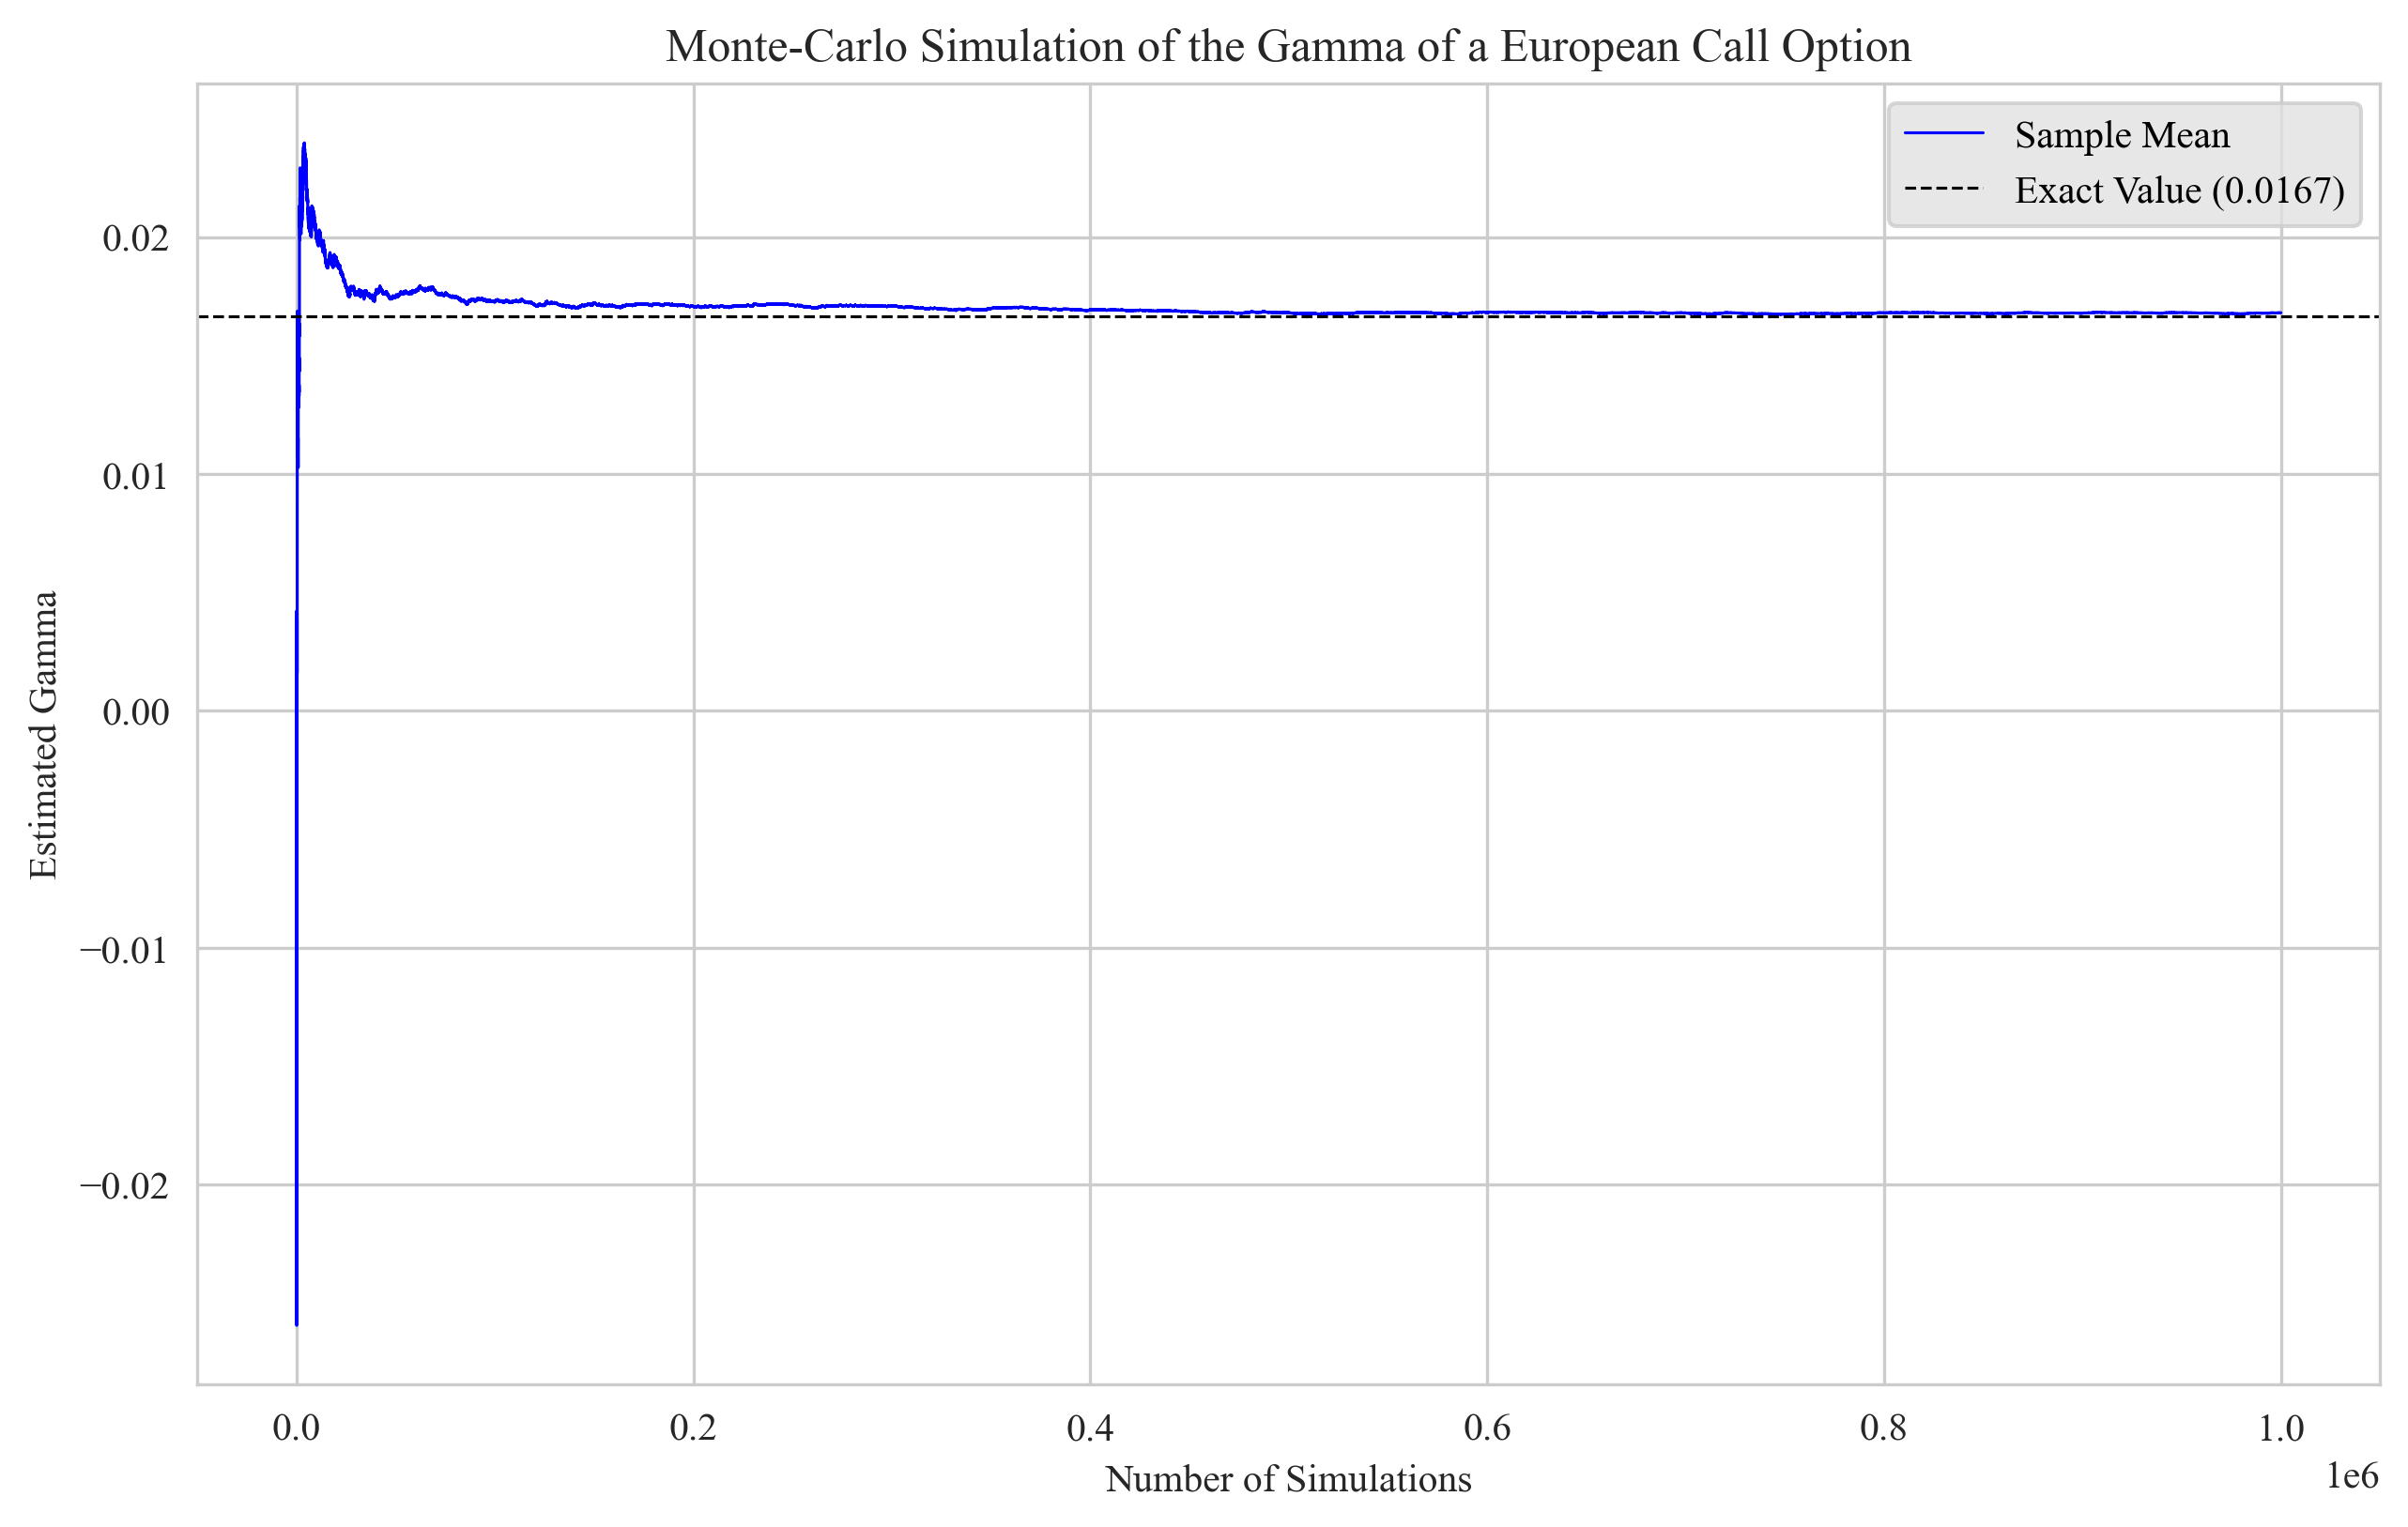

0.016806853318819464

In [34]:
def MonteCarloEuropeanCallGamma(r, sigma, S0, K, T, N, show_performance_metrics = False, show_visualisations = False):
    start = tm.time()
    W = np.random.normal(0, 1, N)                                            
    S = S0 * np.exp((r - (sigma**2) / 2) * T + sigma * np.sqrt(T) * W)                                 
    V = np.maximum(S - K, 0)
    SAMPLE = (np.exp(-r * T) / (sigma * T * S0**2)) * V * ((W**2 - T) / (sigma * T) - W)
    PATH = np.cumsum(SAMPLE) / np.arange(1, N + 1)
    end = tm.time()
    estimate = PATH[-1]
    if show_performance_metrics:
        computation_time = end - start
        if computation_time == 0.0:
            iterations_per_second = "\u221E"
        else:
            iterations_per_second = f"{int(N / computation_time):,}"
        d = (np.log(S0 / K) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
        Gamma = np.exp(-d**2 / 2) / (S0 * sigma * np.sqrt(2 * np.pi * T))
        symbol = "S0".translate(str.maketrans("0", "₀"))
        relative_error = (estimate - Gamma) / estimate
        print(f"Risk-free interest rate: r = {r}")
        print(f"Volatility: \u03C3 = {sigma}")
        print(f"Initial asset price: {symbol} = {S0}")
        print(f"Strike price: K = {K}")
        print(f"Maturity date: T = {T}")
        print(f"Number of simulations: N = {N:,}")
        print(f"Estimate: \u0393 \u2248 {estimate}")
        print(f"Exact value: \u0393 = {Gamma}")
        print(f"Relative error: {100 * relative_error:.2f}%")
        print(f"Computation time: {computation_time:.3f} seconds")
        print(f"Iterations per second: {iterations_per_second}")
    else:
        pass
    if show_visualisations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = PATH, linewidth = 0.75, color = "b", label = "Sample Mean").set(xlabel = "Number of Simulations", ylabel = "Estimated Gamma")
        plt.axhline(Gamma, color = "black", linestyle = "--", linewidth = 0.75, label = f"Exact Value ({Gamma:.4f})")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title("Monte-Carlo Simulation of the Gamma of a European Call Option")
        plt.show()
    else:
        pass
    return estimate

MonteCarloEuropeanCallGamma(r, sigma, S0, K, T, N, True, True)

## **Monte-Carlo Simulation of the Delta of an Asian Fixed Strike Call Option**
### **Theoretical Results for the Asian Fixed Strike Call Delta**
- Payoff function: $$\Phi(S_{T}) = \left(\frac{1}{T}\int_{0}^{T}S_{t}\mathrm{d}t - K\right)^{+}$$
- Definition: $$\Delta = \frac{\partial V_{0}}{\partial S_{0}}$$
- Malliavin expression: $$\Delta = \frac{e^{-rT}}{S_{0}\sigma^2}\mathbb{E}\left[\Phi(S_{T})\left(\frac{2(S_{T} - S_{0})}{\overline{S}_{T}} + \sigma^2 - 2r\right)\right]$$
- where:
$$\overline{S}_{T} = \int_{0}^{T}S_{t}\mathrm{d}t$$

### **Python Implementation for the Asian Fixed Strike Call Delta**

Risk-free interest rate: r = 0.1
Volatility: σ = 0.2
Initial asset price: S₀ = 100
Strike price: K = 100
Maturity date: T = 1
Number of monitoring times: M = 50
Time increment between monitoring times: Δt = 0.020
Number of simulations: N = 1,000,000
Estimate: Δ ≈ 0.09673200842692982
Computation time: 2.487 seconds
Iterations per second: 402,056


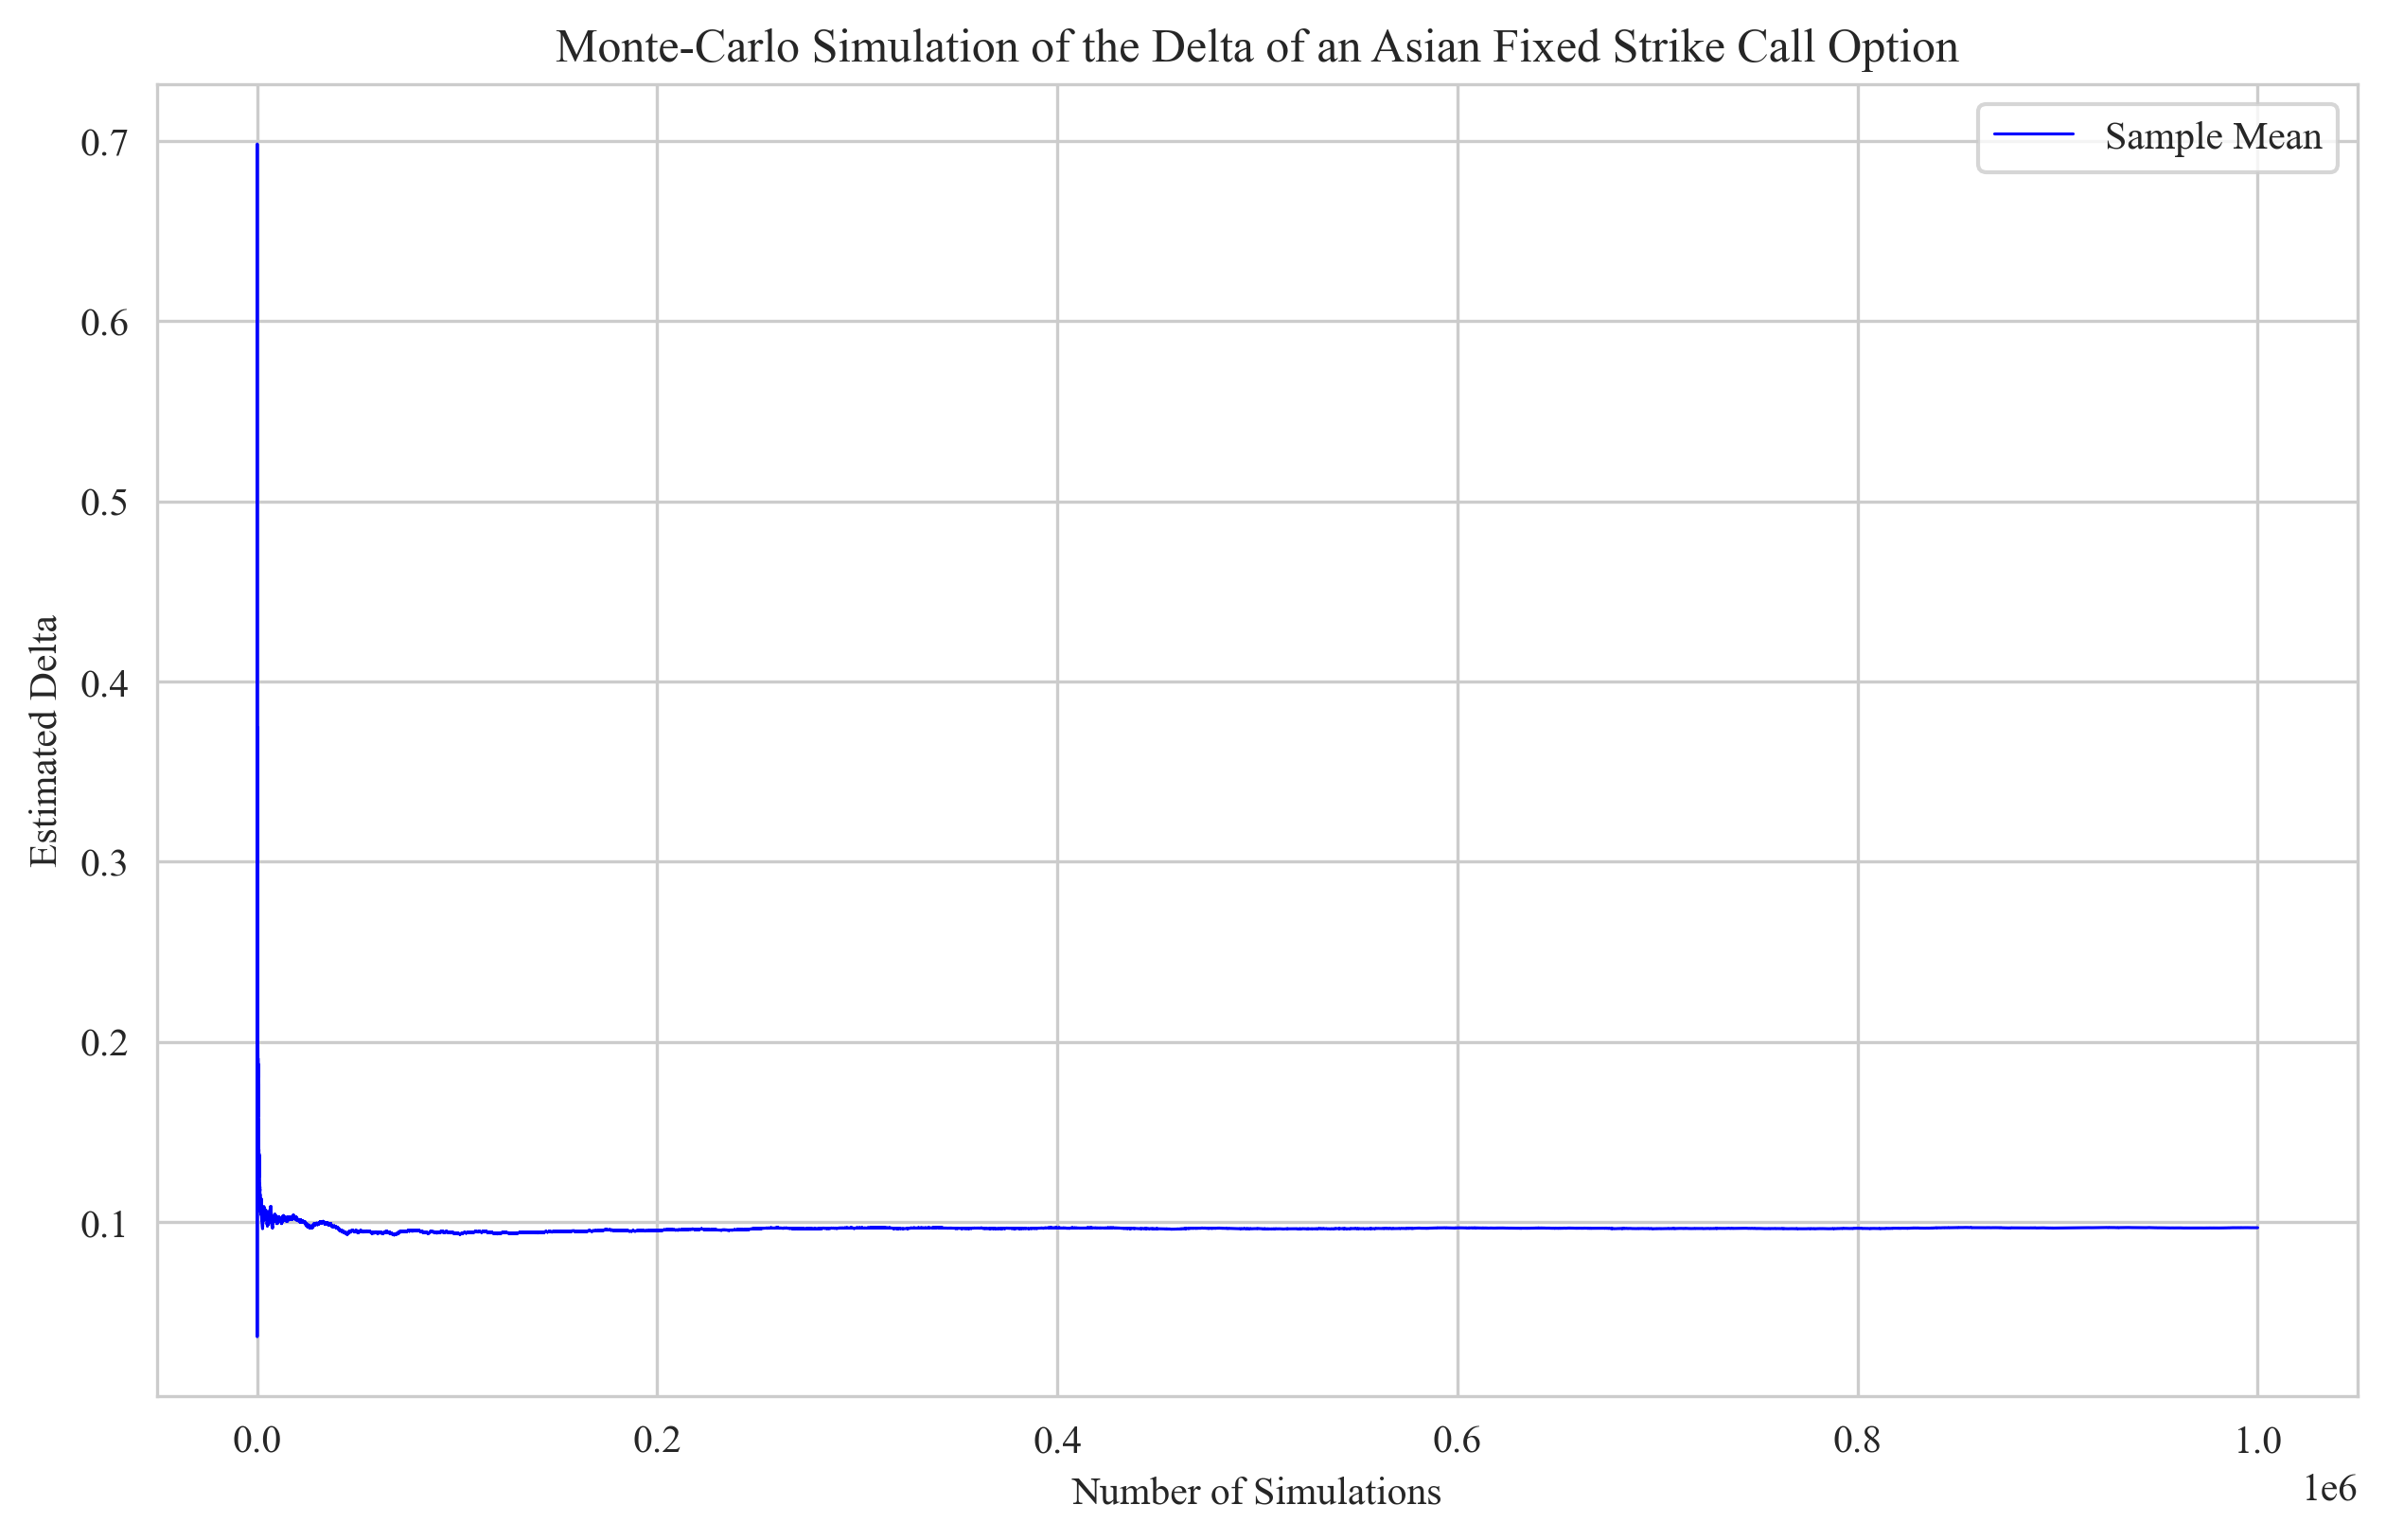

0.09673200842692982

In [35]:
def MonteCarloAsianFixedStrikeCallDelta(r, sigma, S0, K, T, M, N, show_performance_metrics = False, show_visualisations = False):
    dt = T / M
    start = tm.time()
    t = np.arange(0, T + dt, dt)
    W = np.random.normal(0, 1, (N, M + 1))
    S = S0 * np.exp((r - (sigma ** 2) / 2) * t + sigma * np.sqrt(t) * W)
    STBar = np.sum(S * dt, axis = 1)
    ST = S[:,-1]
    V = np.maximum((STBar / T) - K, 0)
    SAMPLE = (np.exp(-r * T) / (S0 * sigma**2)) * V * (2 * (ST - S0) / (STBar) + sigma**2 - 2 * r)
    PATH = np.cumsum(SAMPLE) / np.arange(1, N + 1)
    end = tm.time()
    if show_performance_metrics:
        computation_time = end - start
        if computation_time == 0.0:
            iterations_per_second = "\u221E"
        else:
            iterations_per_second = f"{int(N / computation_time):,}"
        symbol = "S0".translate(str.maketrans("0", "₀"))
        estimate = PATH[-1]
        print(f"Risk-free interest rate: r = {r}")
        print(f"Volatility: \u03C3 = {sigma}")
        print(f"Initial asset price: {symbol} = {S0}")
        print(f"Strike price: K = {K}")
        print(f"Maturity date: T = {T}")
        print(f"Number of monitoring times: M = {M}")
        print(f"Time increment between monitoring times: \u0394t = {dt:.3f}")
        print(f"Number of simulations: N = {N:,}")
        print(f"Estimate: \u0394 \u2248 {estimate}")
        print(f"Computation time: {computation_time:.3f} seconds")
        print(f"Iterations per second: {iterations_per_second}")
    else:
        pass
    if show_visualisations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = PATH, linewidth = 0.75, color = "b", label = "Sample Mean").set(xlabel = "Number of Simulations", ylabel = "Estimated Delta")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title("Monte-Carlo Simulation of the Delta of an Asian Fixed Strike Call Option")                      
        plt.xlabel("Number of Simulations")
        plt.ylabel("Estimated Delta")
        plt.legend(["Sample Mean"])
        plt.title("Monte-Carlo Simulation of the Delta of an Asian Fixed Strike Call Option")
        plt.show()
    else:
        pass
    return estimate

MonteCarloAsianFixedStrikeCallDelta(r, sigma, S0, K, T, M, N, True, True)

## **Monte-Carlo Simulation of the Gamma of an Asian Fixed Strike Call Option**
### **Theoretical Results for the Asian Fixed Strike Call Gamma**
- Payoff function: $$\Phi(S_{T}) = \left(\frac{1}{T}\int_{0}^{T}S_{t}\mathrm{d}t - K\right)^{+}$$
- Definition: $$\Gamma = \frac{\partial^2 V_{0}}{\partial S_{0}^2}$$
- Malliavin expression: $$\Gamma = \frac{4e^{-rT}}{S_{0}^2 \sigma^3}\mathbb{E}\left[\Phi(S_{T})\left(\frac{(S_{T} - S_{0})^2 - (S_{T}-S_{0})\overline{S}_{T}}{\sigma\overline{S}_{T}^2} - \frac{\sigma S_{0}}{\overline{S}_{T}}\right)\right] - \frac{2r}{S_{0} \sigma^2}\Delta$$
where:
$$\overline{S}_{T} = \int_{0}^{T}S_{t}\mathrm{d}t$$
### **Python Implementation for the Asian Fixed Strike Call Gamma**

Risk-free interest rate: r = 0.1
Volatility: σ = 0.2
Initial asset price: S₀ = 100
Strike price: K = 100
Maturity date: T = 1
Number of monitoring times: M = 50
Time increment between monitoring times: Δt = 0.020
Number of simulations: N = 1,000,000
Estimate: Γ ≈ -0.15378347441119786
Computation time: 2.302 seconds
Iterations per second: 434,314


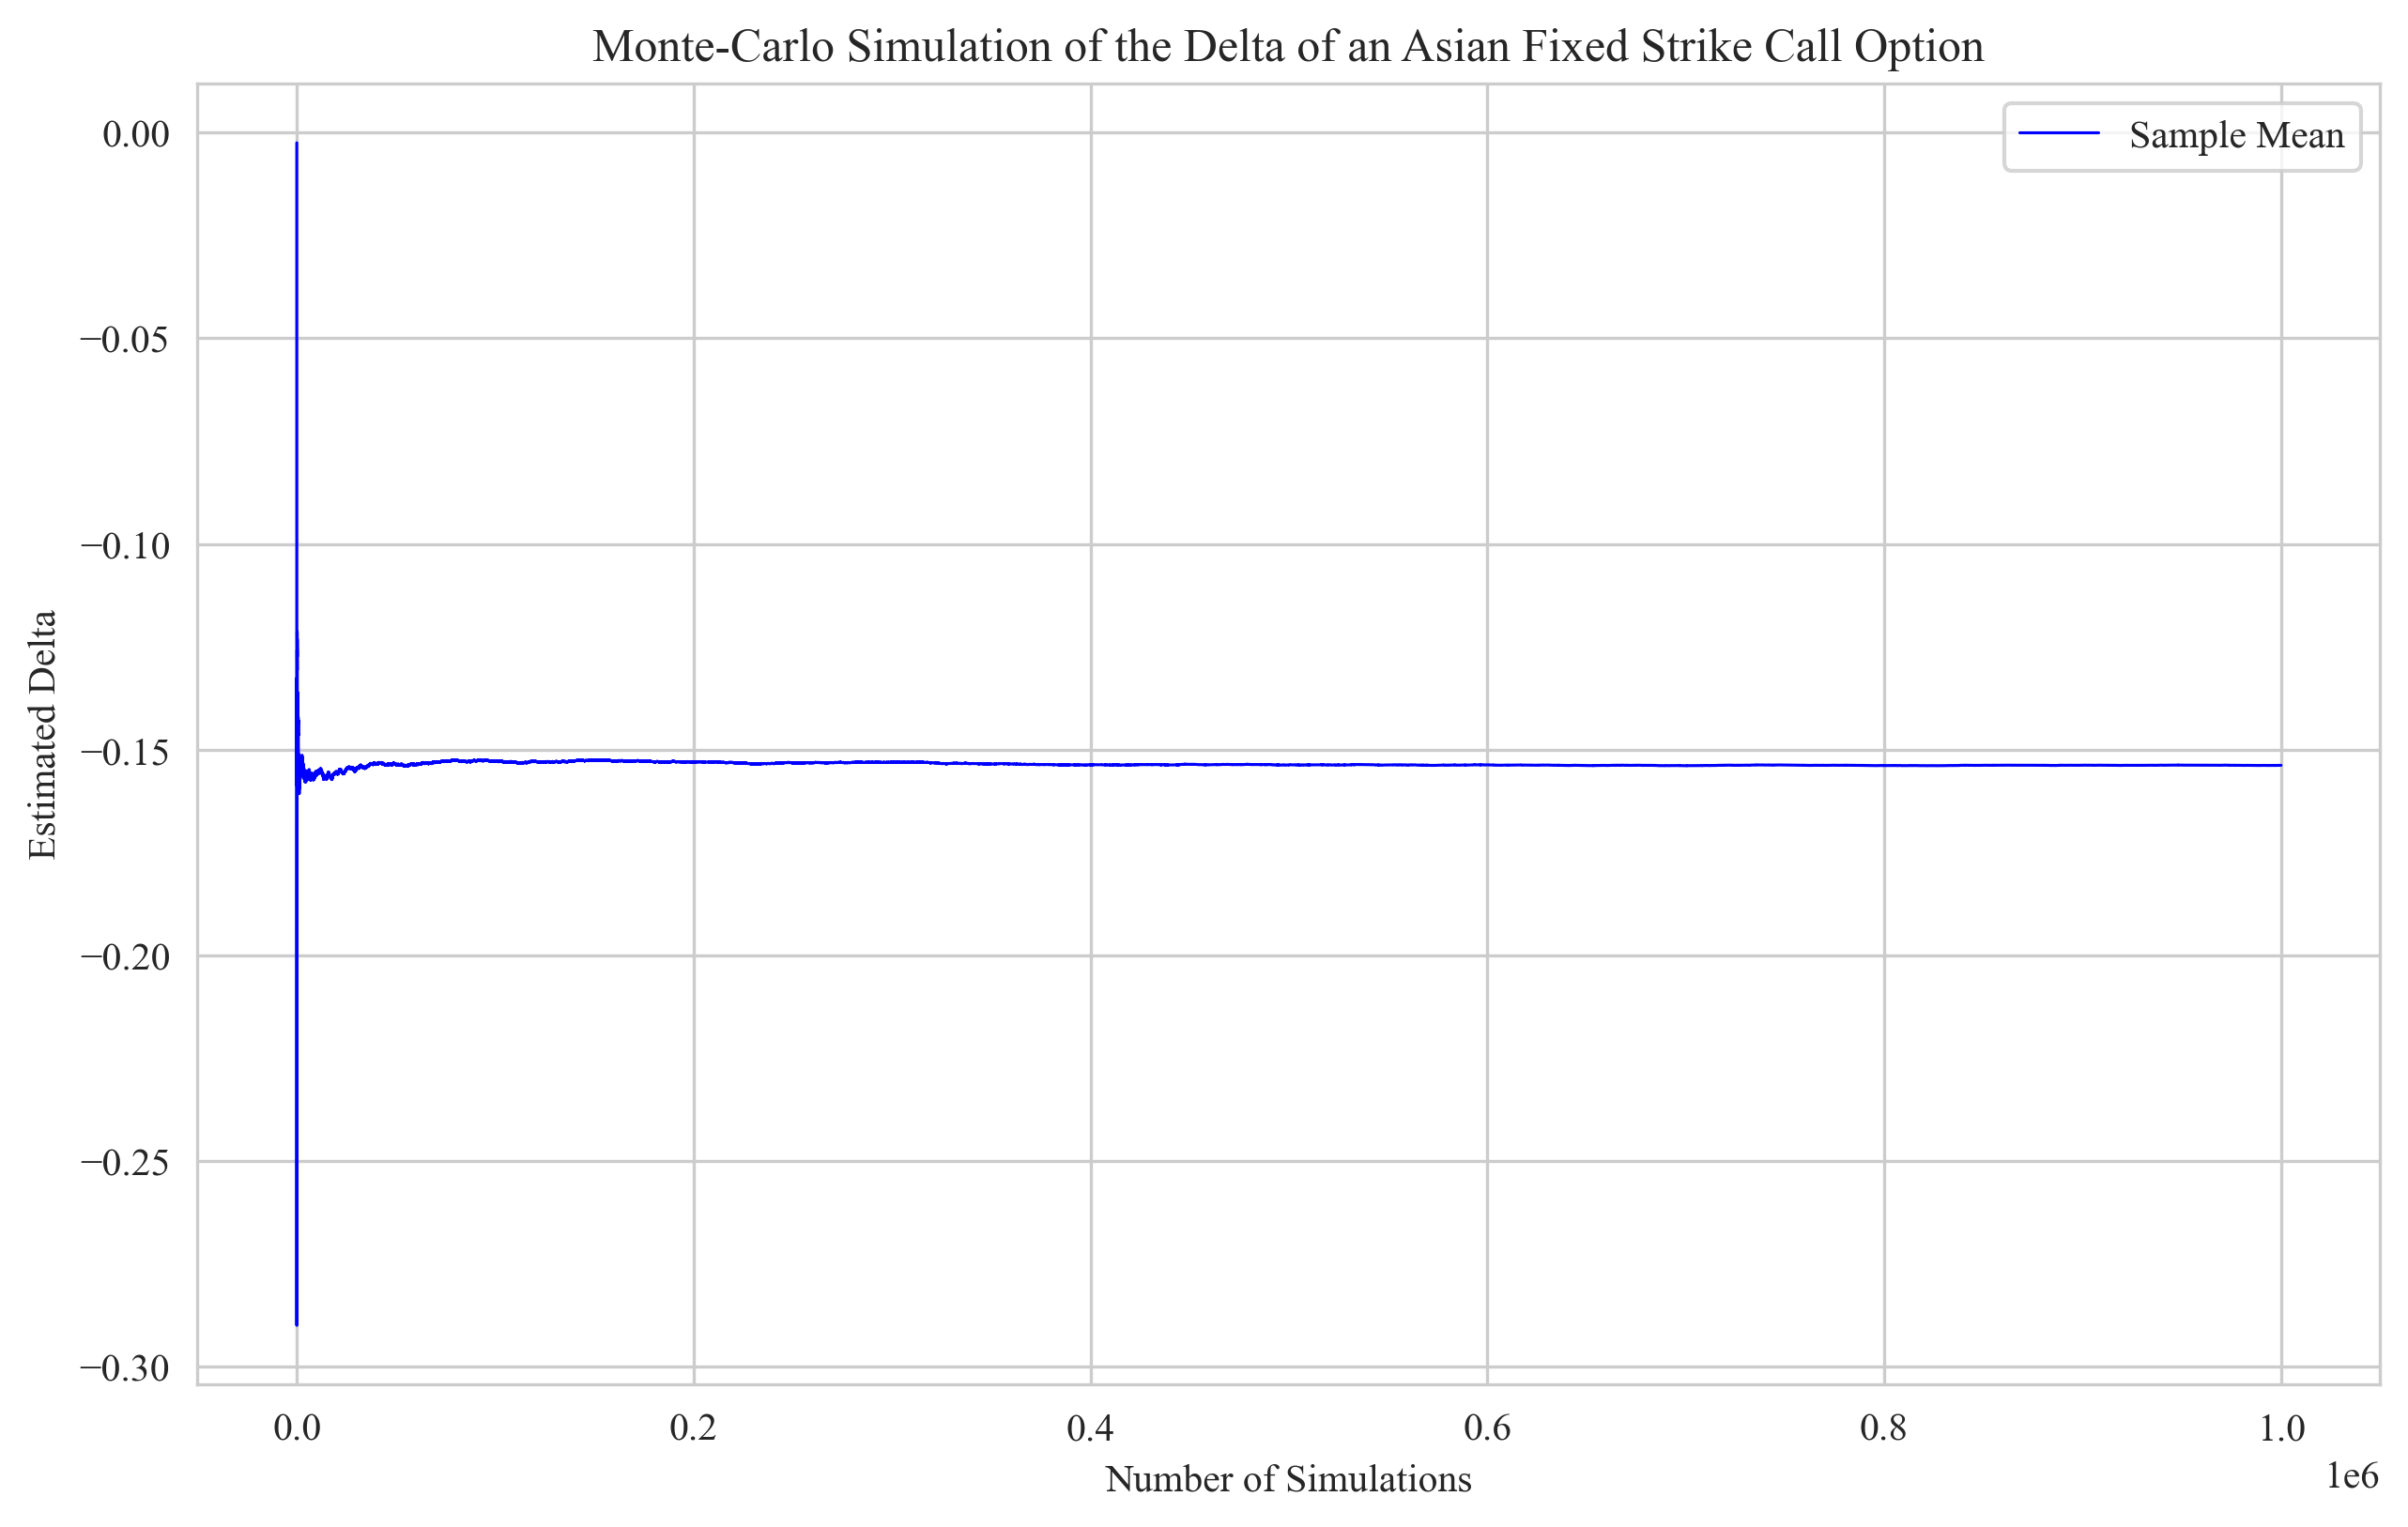

-0.15378347441119786

In [36]:
def MonteCarloAsianFixedStrikeCallGamma(r, sigma, S0, K, T, M, N, show_performance_metrics = False, show_visualisations = False):
    dt = T / M
    start = tm.time()
    t = np.arange(0, T + dt, dt)
    W = np.random.normal(0, 1, (N, M + 1))
    S = S0 * np.exp((r - (sigma ** 2) / 2) * t + sigma * np.sqrt(t) * W)
    STBar = np.sum(S * dt, axis = 1)
    ST = S[:,-1]
    V = np.maximum((STBar / T) - K, 0)
    SAMPLE = ((4 * np.exp(-r * T)) / (S0**2 * sigma**3)) * V * ((((ST - S0)**2 - (ST - S0) * STBar) / (sigma * STBar**2)) - ((sigma * S0) / (STBar))) - ((2 * r) / (S0 * sigma ** 2)) * (np.exp(-r * T) / (S0 * sigma**2)) * V * (2 * (ST - S0) / (STBar) + sigma**2 - 2 * r)
    PATH = np.cumsum(SAMPLE) / np.arange(1, N + 1)
    end = tm.time()
    estimate = PATH[-1]
    if show_performance_metrics:
        computation_time = end - start
        if computation_time == 0.0:
            iterations_per_second = "\u221E"
        else:
            iterations_per_second = f"{int(N / computation_time):,}"
        symbol = "S0".translate(str.maketrans("0", "₀"))
        print(f"Risk-free interest rate: r = {r}")
        print(f"Volatility: \u03C3 = {sigma}")
        print(f"Initial asset price: {symbol} = {S0}")
        print(f"Strike price: K = {K}")
        print(f"Maturity date: T = {T}")
        print(f"Number of monitoring times: M = {M}")
        print(f"Time increment between monitoring times: \u0394t = {dt:.3f}")
        print(f"Number of simulations: N = {N:,}")
        print(f"Estimate: \u0393 \u2248 {estimate}")
        print(f"Computation time: {computation_time:.3f} seconds")
        print(f"Iterations per second: {iterations_per_second}")
    else:
        pass
    if show_visualisations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = PATH, linewidth = 0.75, color = "b", label = "Sample Mean").set(xlabel = "Number of Simulations", ylabel = "Estimated Delta")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title("Monte-Carlo Simulation of the Delta of an Asian Fixed Strike Call Option")
        plt.xlabel("Number of Simulations")
        plt.ylabel("Estimated Delta")
        plt.legend(["Sample Mean"])
        plt.title("Monte-Carlo Simulation of the Delta of an Asian Fixed Strike Call Option")
        plt.show()
    else:
        pass
    return estimate

MonteCarloAsianFixedStrikeCallGamma(r, sigma, S0, K, T, M, N, True, True)

## **Credits**
- Zakaria Zerrouki, [Applications of the Malliavin Calculus to the Black-Scholes Model](https://github.com/mzakariaz/Projects/blob/main/miscellaneous/Application%20of%20the%20Malliavin%20Calculus%20to%20the%20Black%20Scholes%20Model/Applications_of_the_Malliavin_Calculus_to_the_Black_Scholes_Model.pdf), University of Michigan - Ann Arbor (11 April 2023)
- The original code is provided as is in this project by Zakaria Zerrouki. It has also been modified and expanded for the purposes of this project.